
# Задание 1

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

## Задание 1.1

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их.

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Daniel1871/wb-tech-school-hw1/refs/heads/main/python-EDA/shopping_trends.csv") # залил на гит к домашке этот датасет для удобства
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


Сформулируем гипотезы:


1. Применение скидки положительно коррелирует с использованием промокода. Логично предположить, что для получения скидки покупатель использует промокод.
2. Пользователи с подпиской раньше купили намного больше, чем пользователи без подписки в силу своей лояльности (наличия подписки).
3. Пользователи с использованной скидкой имеют бОльшую сумму покупки, нежели пользователи без скидки.
4. Люди пожилого возраста (60+) в основном платят наличными.
5. Пользователи с подпиской ставят рейтинг товару выше, нежели пользователи без подписки в силу своей лояльности к компании.
6. Одежду больше покупают женщины, а не мужчины. P.S. Здесь не про деньги делается предположение, а про количество покупок одежды.



In [3]:
df.shape

(3900, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


Пропусков в данных нет.

Посмотрим, что у нас имеется по числовым данным:

In [6]:
df.describe().map(lambda x: f"{x:.2f}")[['Age', 'Purchase Amount (USD)',  'Review Rating', 'Previous Purchases']]

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00
mean,44.07,59.76,3.75,25.35
std,15.21,23.69,0.72,14.45
min,18.00,20.00,2.50,1.00
25%,31.00,39.00,3.10,13.00
50%,44.00,60.00,3.70,25.00
75%,57.00,81.00,4.40,38.00
max,70.00,100.00,5.00,50.00


Посмотрим, что у нас имеется по нечисловым данным:

In [7]:
df.describe(include=['object'])

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


In [8]:
df['Customer ID'].nunique()

3900

В нашем датасете все пользователи встречаются 1 раз.

### Гипотеза 1

Применение скидки положительно коррелирует с использованием промокода. Логично предположить, что для получения скидки покупатель использует промокод.

In [9]:
discount_promo_tab = pd.crosstab(df['Discount Applied'], df['Promo Code Used'])
discount_promo_tab

Promo Code Used,No,Yes
Discount Applied,,
No,2223,0
Yes,0,1677


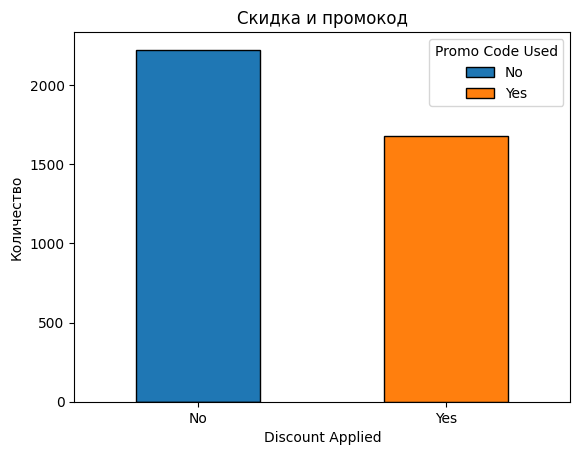

In [10]:
discount_promo_tab.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('Скидка и промокод')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

Видим, что нет ситуаций, когда промокод или скидка используются отдельно. Посмотрим еще на корреляцию Пирсона:

In [11]:
discount_promo_corr = df['Discount Applied'].map({'Yes': 1, 'No': 0}).corr(df['Promo Code Used'].map({'Yes': 1, 'No': 0}))
discount_promo_corr

1.0

Делаем вывод, что данные признаки положительно коррелированы, по сути, линейно связаны. Для имеющихся данные у нас нет оснований отвергнуть нашу гипотезу, так что принимаем ее.

### Гипотеза 2

Пользователи с подпиской раньше купили намного больше, чем пользователи без подписки в силу своей лояльности (наличия подписки).

Хорошо бы посмотреть на среднее количество прошлых заказов у пользователей с подпиской и без.

In [12]:
df.groupby('Subscription Status')['Previous Purchases'].mean().map(lambda x: f"{x:.3f}")

,Previous Purchases
Subscription Status,
No,25.080
Yes,26.085


Посмотрим на корреляцию:

In [13]:
sub_prev_corr = df['Subscription Status'].map({'Yes': 1, 'No': 0}).corr(df['Previous Purchases'])
sub_prev_corr

0.03085943612525038

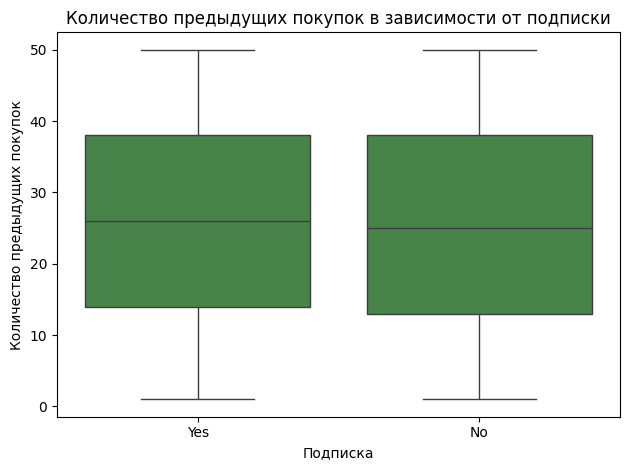

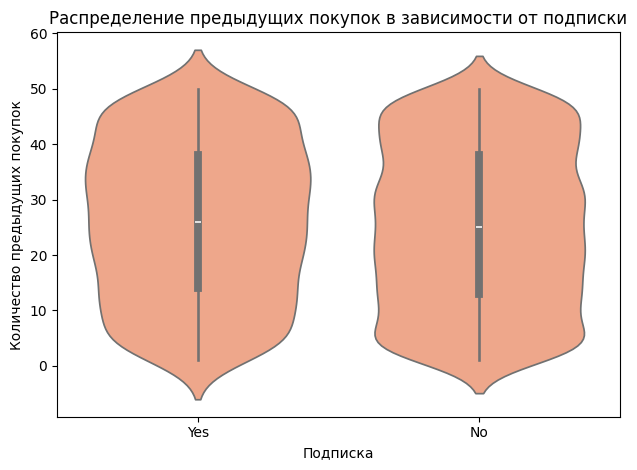

In [14]:
sns.boxplot(data=df, x='Subscription Status', y='Previous Purchases', color='#3E8E41')
plt.title('Количество предыдущих покупок в зависимости от подписки')
plt.xlabel('Подписка')
plt.ylabel('Количество предыдущих покупок')
plt.tight_layout()
plt.show()

sns.violinplot(data=df, x='Subscription Status', y='Previous Purchases', color='#FFA07A')
plt.title('Распределение предыдущих покупок в зависимости от подписки')
plt.xlabel('Подписка')
plt.ylabel('Количество предыдущих покупок')
plt.tight_layout()
plt.show()

С подпиской и без среднее количество прошлых заказов примерно одинаковое, корреляция Пирсона между наличием подписки и количеством прошлых покупок близка к 0; по графикам видим, что распределения похожи. Поэтому мы отвергаем нашу гипотезу.

### Гипотеза 3

Пользователи с использованной скидкой имеют бОльшую сумму покупки, нежели пользователи без скидки.

Посмотрим на среднюю сумму покупок в зависимости от наличия скидки:

In [15]:
df.groupby('Discount Applied')['Purchase Amount (USD)'].mean().map(lambda x: f"{x:.3f}")

,Purchase Amount (USD)
Discount Applied,
No,60.130
Yes,59.279


Посмотрим на корреляцию:

In [16]:
discpint_purch_corr = df['Discount Applied'].map({'Yes': 1, 'No': 0}).corr(df['Purchase Amount (USD)'])
discpint_purch_corr

-0.017798054690021662

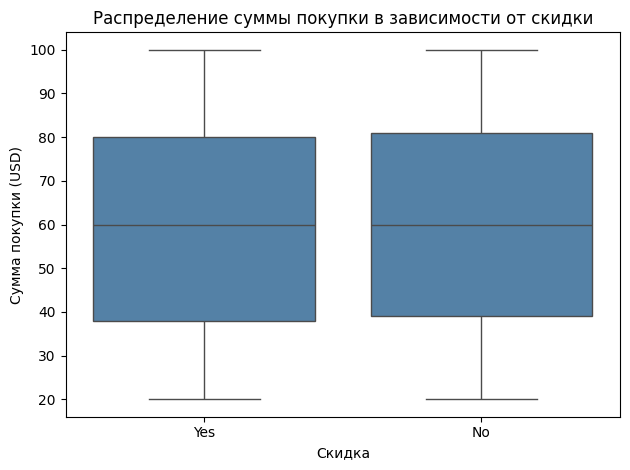

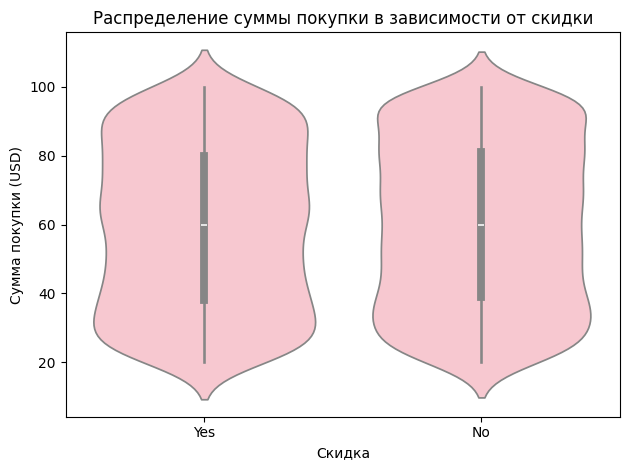

In [17]:
sns.boxplot(data=df, x='Discount Applied', y='Purchase Amount (USD)', color='#4682B4')
plt.title('Распределение суммы покупки в зависимости от скидки')
plt.xlabel('Скидка')
plt.ylabel('Сумма покупки (USD)')
plt.tight_layout()
plt.show()

sns.violinplot(data=df, x='Discount Applied', y='Purchase Amount (USD)',  color='#FFC0CB')
plt.title('Распределение суммы покупки в зависимости от скидки')
plt.xlabel('Скидка')
plt.ylabel('Сумма покупки (USD)')
plt.tight_layout()
plt.show()

Средняя сумма покупки в зависимости от наличия скидки примерно одинаковая, также корреляция Пирсона между наличием скидки и суммой заказа близка к 0, графики нам говорят о том, что распределения похожи. Поэтому делаем вывод, что гипотеза отвергается.

### Гипотеза 4

Люди пожилого возраста (60+) в основном платят наличными. Под платят я имею в виду, что мне интересен столбец `Payment method`.

Посмотрим, каким способом платят такие люди. Результат приведем в процентах от общего числа покупок пожилыми людьми. Также для удобства округлим результат до двух знаков.

In [18]:
elderly = df[df['Age'] >= 60]
(elderly['Payment Method'].value_counts(normalize=True)*100).map(lambda x: f"{x:.2f}")

,proportion
Payment Method,
Venmo,18.78
Credit Card,18.53
Cash,16.88
PayPal,15.61
Bank Transfer,15.61
Debit Card,14.59


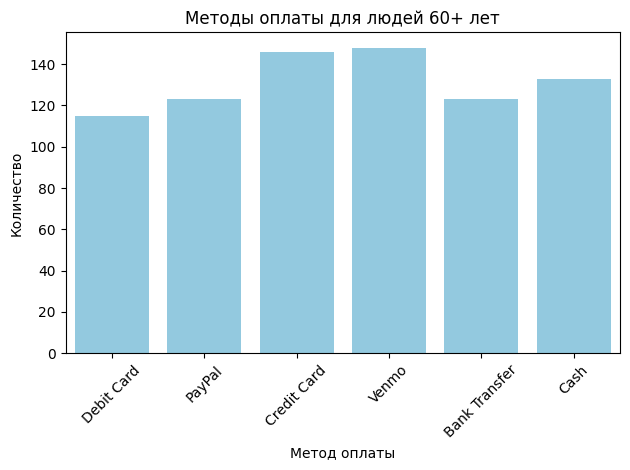

In [19]:
sns.countplot(data=elderly, x='Payment Method', color='skyblue')
plt.title('Методы оплаты для людей 60+ лет')
plt.xticks(rotation=45)
plt.xlabel('Метод оплаты')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

Видим, что кэшэм пожилые люди платят далеко не всегда. Отвергаем гипотезу.

### Гипотеза 5

Пользователи с подпиской ставят рейтинг товару выше, нежели пользователи без подписки в силу своей лояльности к компании.


Посмотрим, на рейтинг, которые ставят пользователи как с подпиской и без:

In [20]:
df.groupby('Subscription Status')['Review Rating'].mean().map(lambda x: f"{x:.3f}")

,Review Rating
Subscription Status,
No,3.753
Yes,3.742


Посмотрим на корреляцию:

In [21]:
sub_rate_corr = df['Subscription Status'].map({'Yes': 1, 'No': 0}).corr(df['Review Rating'])
sub_rate_corr

-0.006368054269748981

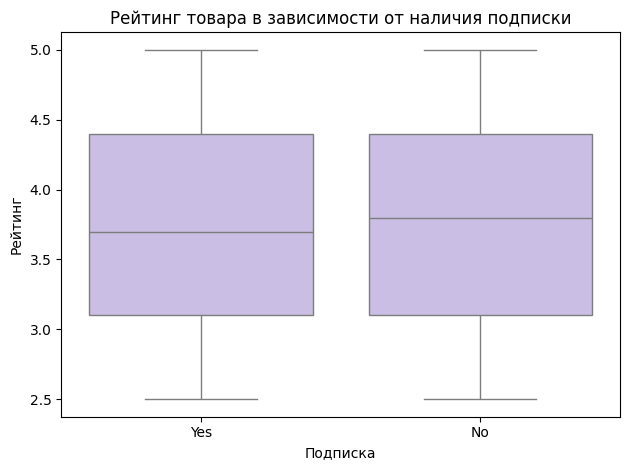

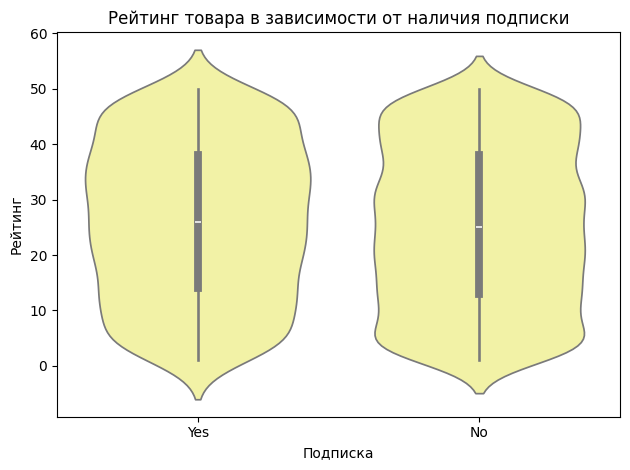

In [22]:
sns.boxplot(data=df, x='Subscription Status', y='Review Rating', color='#C7B8EA')
plt.title('Рейтинг товара в зависимости от наличия подписки')
plt.xlabel('Подписка')
plt.ylabel('Рейтинг')
plt.tight_layout()
plt.show()

sns.violinplot(data=df, x='Subscription Status', y='Previous Purchases', color='#FFFF99')
plt.title('Рейтинг товара в зависимости от наличия подписки')
plt.xlabel('Подписка')
plt.ylabel('Рейтинг')
plt.tight_layout()
plt.show()

Средний рейтинг при наличии подписки и при отсуствии примерно одинаков, корреляция Пирсона между наличием подписки и рейтингом близка к 0, на графиках мы видим похожие друг на друга распределения. В связи с этим отвергаем гипотезу.

### Гипотеза 6

Одежду больше покупают женщины, а не мужчины. P.S. Здесь не про деньги делается предположение, а про количество покупок одежды.

Посмотрим на то, сколько мужчин и женщин в категории `Clothing`. Результат приведем в процентах от общего числа покупок в этой категории. Также для удобства округлим результат до двух знаков.

P.S. Хотя и в нашем датасете пользователи встречаются 1 раз $⇒$ не надо париться об уникальности / неуникальности, я все равно считаю, что для этой гипотезы не надо рассматривать уникальных людей конкретных полов, ведь если женщина количественно купила больше чем мужчина за несколько заказов, то она все равно купила больше мужчины.

Также при проверке данной гипотезы мы не можем учитывать историю (столбец `Previous Purchases`, ведь нам неизвестно в этих прошлых покупках, одежда ли покупалась или что-то другое).

In [23]:
df_clothing = df[df['Category'] == 'Clothing']
(df_clothing['Gender'].value_counts(normalize=True)*100).map(lambda x: f"{x:.2f}")

,proportion
Gender,
Male,67.99
Female,32.01


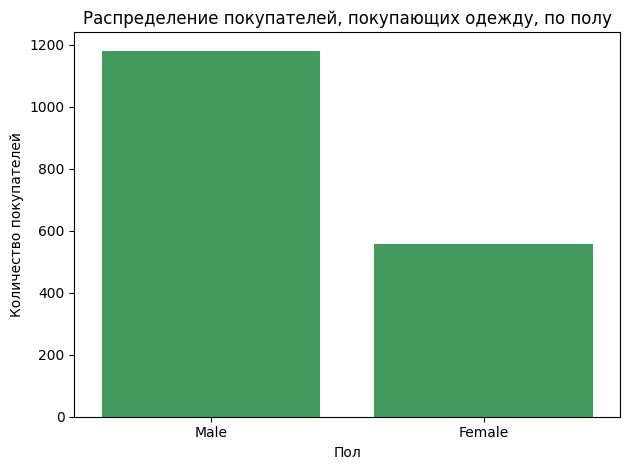

In [24]:
sns.countplot(data=df_clothing, x='Gender', color='#34A85A')
plt.title('Распределение покупателей, покупающих одежду, по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.tight_layout()
plt.show()

Хм, удивительный результат. Интересно взглянуть на то, кто больше покупал по всему датасету:

In [25]:
df['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
Male,68.0
Female,32.0


Мы предполагали, что женщины покупают одежду чаще, но оказывается наоборот: мужчины более чем в 2 раза чаще покупают одежду. Но мы можем понять причину этого: в изначальном датасете мужчин в 2 раза больше чем женщин - также и при рассмотрении категории одежда.

Анализируя полученные результаты мы не можем сказать, что одежда женщинами покупается чаще чем мужчинами: в абсолютных цифрах мужчины покупают чаще, а в относительных - при переходе от рассмотрения всего датасета к рассмотрении категории одежда картина остается такой же.

Итог: отвергаем нашу гипотезу.

## Задание 1.2

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды.

### Нахождение самого популярного товара

In [26]:
item_val_cnt = df['Item Purchased'].value_counts()
item_val_cnt.head()

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166


С помощью метода `value_counts` мы получили товары, отсортированные по частоте $⇒$ сразу понимаем, что самый популярный товар - это `Blouse`. Убеждаемся:

In [27]:
print(f'Самый популярный товар: {item_val_cnt.idxmax()}')

Самый популярный товар: Blouse


### Распределение покупателей по полу

Вообще говоря, когда нам интересно посмотреть на распределение покупателей по полу, я считаю, что нам интересны уникальные покупатели (зачем нам учитывать несколько раз человека, который просто сделал несколько покупок, покупатель то это один).

Как раз в нашем датасете покупатели встречаются 1 раз $⇒$ не надо париться об уникальности (ведь мы делаем EDA конкретного датасета Customer Shopping Trends; был бы другой датасет, мы бы возможно поменяли наш подход - например, были бы пропуски и пришлось бы их как-то обработать).

Посмотрим, сколько у нас в данных женщин и мужчин в процентах:

In [28]:
df['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
Male,68.0
Female,32.0


Визуализируем искомое распределение:

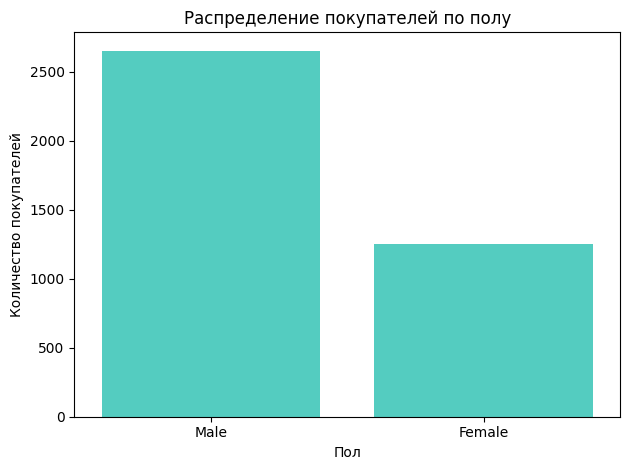

In [29]:
sns.countplot(data=df, x='Gender', color='turquoise')
plt.title('Распределение покупателей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.tight_layout()
plt.show()

Среди покупателей мужчин в 2 раза больше.

### Какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары?

При ответе на вопрос, какой пол/возраст покупает больше всего, я буду рассматривать именно количество покупок покупателями определенного пола. Нет смысла рассматривать сумму покупок данными покупателями, т.к. в наших данных есть лишь количество прошлых покупок `Previous Purchases`, но сумм этих прошлых покупок нету.

Т.е. я понимаю пол/возраст покупает больше всего, как **суммарное количество покупок (включая историю) по полу/возрасту уникальными людьми больше, чем у других полов / возрастов**.

Уникальными, потому что если человек купил 5 раз, и мы все эти 5 раз будем плюсовать его исторические `Previous Purchases`, то мы получим не пойми что. В наших данных пользователи уникальны, нам обрабатывать эту ситуацию как-то специфически не требуется.

In [30]:
df_copy = df.copy() # Создаем копию датасета, чтобы вставлять столбцы в этом пункте, а для след. пунктов остался датасет нетронутый
df_copy['Previous Purchases'] += 1 # Не учитывается текущий заказ (на kaggle указано). Добавим его (+1), ведь это может повлиять на результат.
df_copy.rename(columns={'Previous Purchases':'Sum Purchases'}, inplace=True)

Итак, в `df_copy` в столбце `Sum Purchases` содержится кол-во покупок уникальными людьми.

In [31]:
gender_amount_tab = df_copy.groupby('Gender')['Sum Purchases'].sum() # Суммируем полученные кол-ва покупок для каждого пола
gender_amount_tab

,Sum Purchases
Gender,
Female,31944
Male,70827


In [32]:
print(f'Пол {gender_amount_tab.idxmax()} покупает больше всего')

Пол Male покупает больше всего


Чтобы определить, какой пол / возраст покупает чаще всего, нам надо воспользоваться частотами из столбца `Frequency of Purchases`. По моему мнению, для ответа на этот вопрос, надо понять какая средняя частота покупок у обоих полов. В упомянутом столбце содержатся следующие частоты:

In [33]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

Проблема в том, что данные нечисловые. Переведем их в числа по количеству дней в частоте:

In [34]:
frequency_map = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Annually': 365,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Monthly': 30,
    'Every 3 Months': 90
}

In [35]:
df_copy['Frequency of Purchases'] = df_copy['Frequency of Purchases'].map(frequency_map)
df_copy.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Sum Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,15,Venmo,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,3,Cash,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,24,Credit Card,7


In [36]:
gender_freq_tab = df_copy.groupby('Gender')['Frequency of Purchases'].mean()
gender_freq_tab

,Frequency of Purchases
Gender,
Female,89.056891
Male,89.168929


Мы получили, что мужчины и женщины в среднем делают покупку раз в 89 дней (различия лишь в дробной части начинаются).

Но раз уж у нас спрашивают, кто покупает чаще, то дадим ответ (чаще в этом случае означает `Frequency of Purchases` минимально):

In [37]:
print(f'Пол {gender_freq_tab.idxmin()} покупает чаще всего')

Пол Female покупает чаще всего


Для ответа на вопрос  какой пол / возраст покупает самые дорогие товары определимся с понятием "самые дорогие товары". Будем считать такими товарами 10% самых дорогих товаров. А для ответа на вопрос, определим, кто больше покупал таких товаров. Определим порог для отбора этих товаров с помощью квантиля уровня 0.9:

In [38]:
threshold = df['Purchase Amount (USD)'].quantile(0.9)
threshold

93.0

In [39]:
gender_exp_tab = df[df['Purchase Amount (USD)'] > threshold]['Gender'].value_counts()
gender_exp_tab

,count
Gender,
Male,244
Female,117


In [40]:
print(f'Пол {gender_exp_tab.idxmax()} покупает самые дорогие товары')

Пол Male покупает самые дорогие товары


Итак, в нашем датасете мужчины больше покупают, также больше покупают дорогих товаров - это в целом логично, ведь в прошлом пункте мы выяснили, что мужчин в датасете гораздо больше.

Теперь сделаем аналогично для возраста. Но, как мне кажется, возраст сам по себе особо не информативен, а информативна именно возрастная категория. Как и в мастерклассе от WB-аналитика, для деления на сегменты будем использовать квантили:

In [41]:
quant = df['Age'].quantile(np.arange(0, 1.1, 0.1))
quant

,Age
0.0,18.0
0.1,23.0
0.2,28.0
0.3,33.0
0.4,39.0
0.5,44.0
0.6,49.0
0.7,55.0
0.8,60.0
0.9,65.0


In [42]:
df_copy['Age Segment'] = pd.cut(
    df["Age"],
    bins=quant.values,
    labels=['18-23', '23-28', '28-33', '33-39', '39-44', '44-49', '49-55', '55-60', '60-65', '65-70'],
    include_lowest=True
)
df_copy.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Sum Purchases,Preferred Payment Method,Frequency of Purchases,Age Segment
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,15,Venmo,14,49-55
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,3,Cash,14,18-23
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,24,Credit Card,7,49-55


Далее все расчеты аналогичны расчетам с полом:

In [43]:
age_amount_tab = df_copy.groupby('Age Segment', observed=False)['Sum Purchases'].sum()
age_amount_tab

,Sum Purchases
Age Segment,
18-23,10482
23-28,10032
28-33,9653
33-39,11128
39-44,9922
44-49,9250
49-55,12256
55-60,10487
60-65,9924


In [44]:
print(f'Возрастная категория {age_amount_tab.idxmax()} лет покупает больше всего')

Возрастная категория 49-55 лет покупает больше всего


In [45]:
age_freq_tab = df_copy.groupby('Age Segment', observed=False)['Frequency of Purchases'].mean()
age_freq_tab

,Frequency of Purchases
Age Segment,
18-23,95.925837
23-28,81.861979
28-33,78.037736
33-39,95.820513
39-44,87.633152
44-49,85.983827
49-55,76.654185
55-60,100.034031
60-65,100.527174


In [46]:
print(f'Возрастная категория {age_freq_tab.idxmin()} лет покупает чаще всего')

Возрастная категория 49-55 лет покупает чаще всего


In [47]:
age_exp_tab = df_copy[df['Purchase Amount (USD)'] > threshold]['Age Segment'].value_counts()
age_exp_tab

,count
Age Segment,
49-55,50
23-28,44
18-23,41
44-49,36
33-39,34
60-65,34
28-33,32
65-70,31
55-60,30


In [48]:
print(f'Возрастная категория {age_exp_tab.idxmax()} лет покупает самые дорогие товары')

Возрастная категория 49-55 лет покупает самые дорогие товары


Какая замечательная возрастная категория 49-55 лет - и больше всех, и чаще всех, и самые дорогие товары покупает.

### Есть ли зависимость между цветом одежды и сезоном?

Мы понимаем, что если есть зависимость, то в один сезон конкретные цвета продаются  лучше, а в другой сезон - хуже (например, красные товары продаются лучше летом, чем зимой).

Чтобы не зависеть от абсолютных цифр (например, люди просто-напросто вещи черного и белого цвета могут покупать больше чем другие цвета - доминирование в абсолютных цифрах, но не факт что в сезонности), будем рассматривать, как распределен каждый цвет по сезону в относительных величинах.

Т.е. если будет зависимость, то мы увидим, например, что серобуромалиновый цвет продается зимой гораздо лучше, чем летом.

Посмотрим, что у нас творится в цветах и сезонах:

In [49]:
color_season_tab = pd.crosstab(df['Color'], df['Season'], normalize='index')
color_season_tab.head()

Season,Fall,Spring,Summer,Winter
Color,,,,
Beige,0.231293,0.265306,0.251701,0.251701
Black,0.251497,0.257485,0.251497,0.239521
Blue,0.210526,0.256579,0.302632,0.230263
Brown,0.248227,0.234043,0.234043,0.283688
Charcoal,0.209150,0.274510,0.235294,0.281046


Посмотрим на все эти значения на тепловой карте:

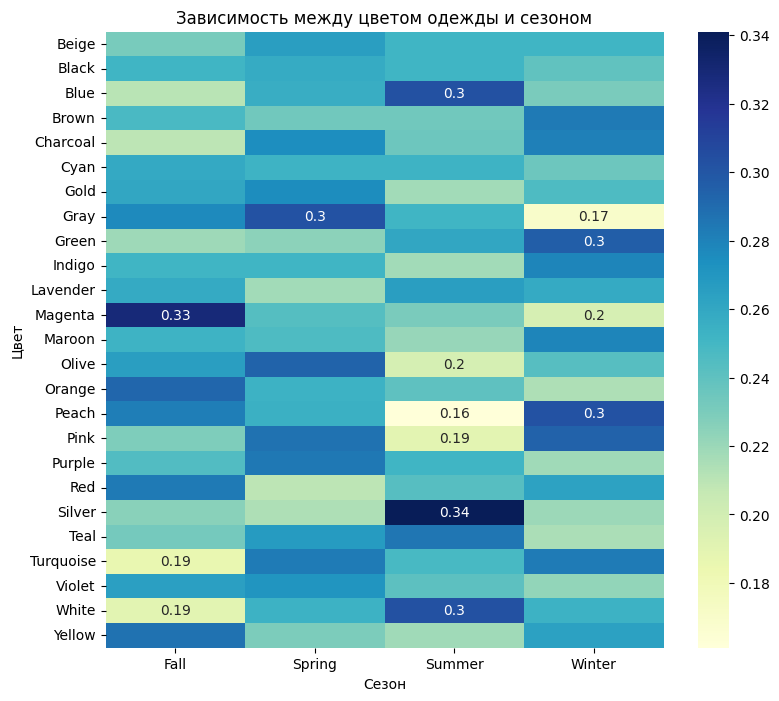

In [50]:
plt.figure(figsize=(9, 8))
color_season_hmap = sns.heatmap(color_season_tab, annot=True, cmap='YlGnBu')

for t in color_season_hmap.texts: # отобразим в результате только чиселки, которые очень выделяются
    if float(t.get_text()) >= 0.3 or float(t.get_text()) <= 0.2:
        t.set_text(t.get_text())
    else:
        t.set_text("")

plt.title('Зависимость между цветом одежды и сезоном')
plt.xlabel('Сезон')
plt.ylabel('Цвет')
plt.show()

По графику можем наблюдать, что глобальных трендов, когда в какой-то сезон покупают все цвета больше чем в другой сезон, не наблюдается. Но определенная сезонность присутствует:

* Осенью больше всего (по отношению к другим сезонам) покупают цвет `Magenta`, меньше всего - `Turquoise`, `White`
* Весной больше всего покупают цвет `Gray`
* Летом больше всего покупают цвета `Blue`, `Silver`, `White`, меньше всего `Olive`, `Peach`, `Pink`
* Зимой больше всего покупают цвета `Green`, `Peach`, меньше всего `Gray`, `Magenta`

Отвечаем на поставленный вопрос: да, определенная зависимость между цветом одежды и сезоном присутствует.

### Расчет сезонного mau (уникальных пользователей за сезон) и его динамики

Тут можно конечно вспомнить, что в `df` представлены только уникальные пользователи и использовать `df['Season'].value_counts()`, но для читаемости я оставлю другое решение. Также для просмотра динамики сезонного mau, изменим порядок индексов на более удобочитаемый для нас:

In [51]:
mau_tab = df.groupby('Season')['Customer ID'].nunique().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
mau_tab

,Customer ID
Season,
Winter,971
Spring,999
Summer,955
Fall,975


Посмотрим не на абсолютные частоты, а на относительные:

In [52]:
mau_norm_tab = (mau_tab / mau_tab.sum()) * 100
round(mau_norm_tab, 1)

,Customer ID
Season,
Winter,24.9
Spring,25.6
Summer,24.5
Fall,25.0


In [53]:
print(f'Относительные частоты сезонных mau различаются максимум на {round(max(mau_norm_tab) - min(mau_norm_tab), 2)}%')

Относительные частоты сезонных mau различаются максимум на 1.13%


Видим, что относительные частоты сезонных mau от общего числа уникальных пользователей близки и не различаются на более чем 1.2%.

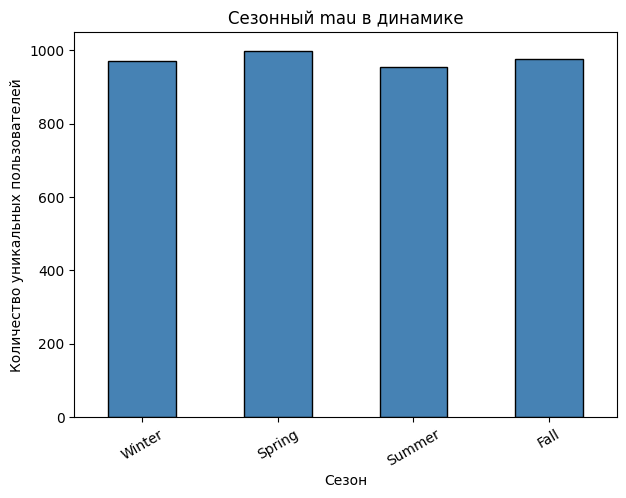

In [54]:
mau_tab.plot(kind='bar', figsize=(7, 5), color='#4682B4', edgecolor='black')
plt.title('Сезонный mau в динамике')
plt.xlabel('Сезон')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=30)
plt.show()

Значение mau наибольшее - весной, но в зависимости от сезона сильных скачков в mau не наблюдается.

Также, может быть интересно глянуть отношение следующего времени года к предыдущему, но исходя из данных, которые лежат в датасете, мы даже понять не можем, что какое время года ранее всех начинается.

### Самая популярная буква в названии одежды.

Будем рассматривать уникальную одежду, иначе поиск самый популярной буквы может превратиться в поиск самой популярной одежды (а лишь потом буквы в этой одежде).

In [55]:
items = df[df['Category'] == 'Clothing']['Item Purchased'].unique()
items

array(['Blouse', 'Sweater', 'Jeans', 'Shirt', 'Shorts', 'Dress', 'Skirt',
       'Pants', 'Hoodie', 'T-shirt', 'Socks'], dtype=object)

Теперь соединяем названия в одну строку, переводим в нижний регистр, убираем `-` (это же не буква), преобразуем в список букв. Далее с помощью `np.unique` получаем уникальные буквы и их частоты.

In [56]:
letters = list(''.join(items).lower().replace('-',''))
unique_letters, counts = np.unique(letters, return_counts=True)

Находим индекс самой популярной буквы через `np.argmax` и выведем эту букву:

In [57]:
print(f'Самая популярная буква в названии одежды: {unique_letters[np.argmax(counts)]}')

Самая популярная буква в названии одежды: s


# Задание 2

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption.

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/alcohol-consumption/drinks.csv")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [59]:
df.shape

(193, 5)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [61]:
df.isnull().sum()

,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0


Нету пропусков в данных.

In [62]:
df.describe().map(lambda x: f"{x:.2f}")

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.00,193.00,193.00,193.00
mean,106.16,80.99,49.45,4.72
std,101.14,88.28,79.70,3.77
min,0.00,0.00,0.00,0.00
25%,20.00,4.00,1.00,1.30
50%,76.00,56.00,8.00,4.20
75%,188.00,128.00,59.00,7.20
max,376.00,438.00,370.00,14.40


In [63]:
df.describe(include=['object'])

,country
count,193
unique,193
top,Afghanistan
freq,1


Чтобы понять, где же люди пьют больше вина, пива и других спиртных напитков, найдем топ 10 стран по каждому из параметров.

10 стран с самым большим количеством выпитых бокалов вина, банок пива и шотов крепких напитков найдем с помощью метода `nlargest`. Также для удобного просмотра результатов сделаем индекс последовательным с помощью `reset_index`. И ради интереса посмотрим в результате еще на столбец `total_litres_of_pure_alcohol` - интересно же сколько человек в одной из этих стран выпил литров за год.

In [64]:
df_beer = df[['country', 'beer_servings', 'total_litres_of_pure_alcohol']].nlargest(10, 'beer_servings').reset_index(drop=True)
df_beer

,country,beer_servings,total_litres_of_pure_alcohol
0,Namibia,376,6.8
1,Czech Republic,361,11.8
2,Gabon,347,8.9
3,Germany,346,11.3
4,Lithuania,343,12.9
5,Poland,343,10.9
6,Venezuela,333,7.7
7,Ireland,313,11.4
8,Palau,306,6.9
9,Romania,297,10.4


Визуализируем для наглядности:

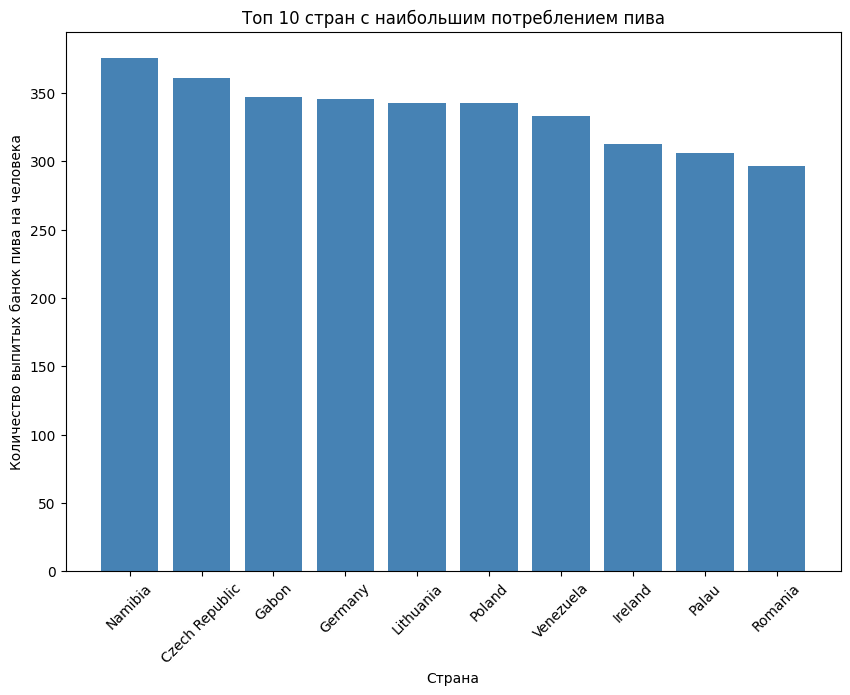

In [65]:
plt.figure(figsize=(10, 7))
plt.bar(df_beer['country'], df_beer['beer_servings'], color='#4682B4')
plt.xlabel('Страна')
plt.ylabel('Количество выпитых банок пива на человека')
plt.title('Топ 10 стран с наибольшим потреблением пива')
plt.xticks(rotation=45)
plt.show()

In [66]:
df_wine = df[['country', 'wine_servings', 'total_litres_of_pure_alcohol']].nlargest(10, 'wine_servings').reset_index(drop=True)
df_wine

,country,wine_servings,total_litres_of_pure_alcohol
0,France,370,11.8
1,Portugal,339,11.0
2,Andorra,312,12.4
3,Switzerland,280,10.2
4,Denmark,278,10.4
5,Slovenia,276,10.6
6,Luxembourg,271,11.4
7,Croatia,254,10.2
8,Italy,237,6.5
9,Equatorial Guinea,233,5.8


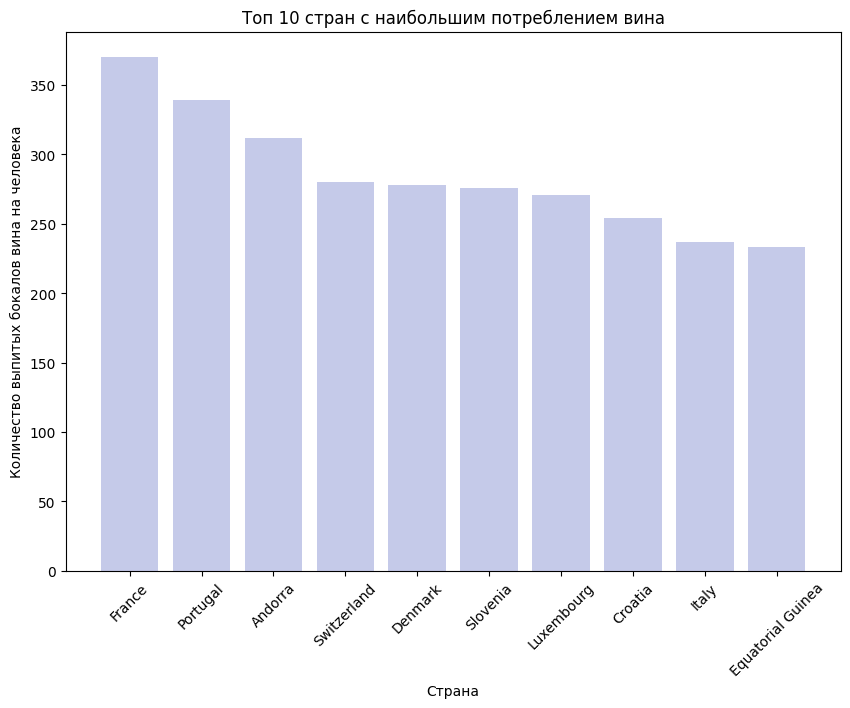

In [67]:
plt.figure(figsize=(10, 7))
plt.bar(df_wine['country'], df_wine['wine_servings'], color='#C5CAE9')
plt.xlabel('Страна')
plt.ylabel('Количество выпитых бокалов вина на человека')
plt.title('Топ 10 стран с наибольшим потреблением вина')
plt.xticks(rotation=45)
plt.show()

In [68]:
df_spirit = df[['country', 'spirit_servings', 'total_litres_of_pure_alcohol']].nlargest(10, 'spirit_servings').reset_index(drop=True)
df_spirit

,country,spirit_servings,total_litres_of_pure_alcohol
0,Grenada,438,11.9
1,Belarus,373,14.4
2,Haiti,326,5.9
3,Russian Federation,326,11.5
4,St. Lucia,315,10.1
5,Guyana,302,7.1
6,Slovakia,293,11.4
7,Dominica,286,6.6
8,Thailand,258,6.4
9,Cook Islands,254,5.9


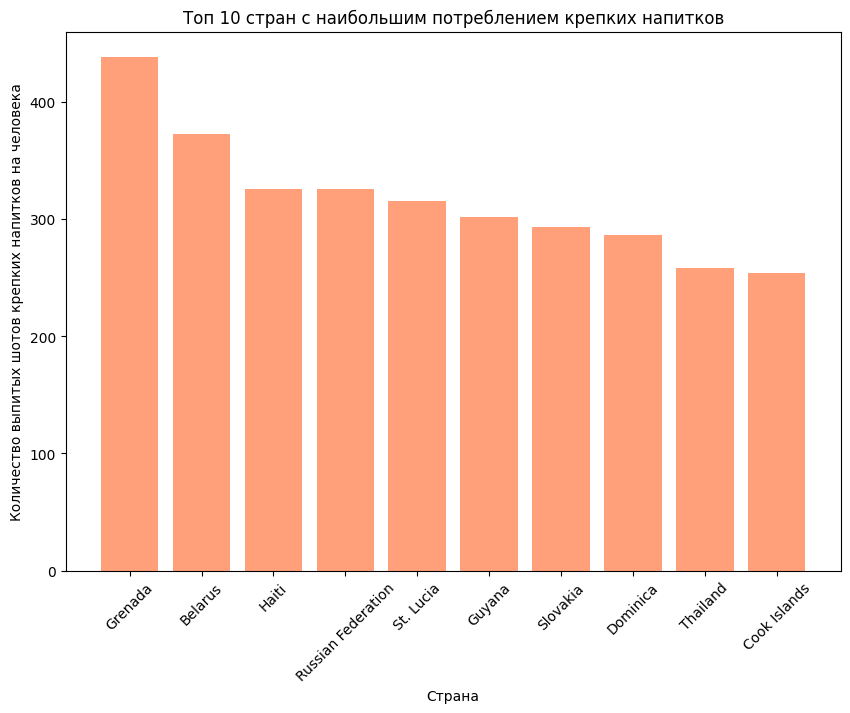

In [69]:
plt.figure(figsize=(10, 7))
plt.bar(df_spirit['country'], df_spirit['spirit_servings'], color='#FFA07A')
plt.xlabel('Страна')
plt.ylabel('Количество выпитых шотов крепких напитков на человека')
plt.title('Топ 10 стран с наибольшим потреблением крепких напитков')
plt.xticks(rotation=45)
plt.show()

Ради интереса посмотрим еще на страны, где граждане больше всего пьют алкоголя в литрах:

In [70]:
df_litres = df[['country', 'total_litres_of_pure_alcohol']].nlargest(10, 'total_litres_of_pure_alcohol').reset_index(drop=True)
df_litres

,country,total_litres_of_pure_alcohol
0,Belarus,14.4
1,Lithuania,12.9
2,Andorra,12.4
3,Grenada,11.9
4,Czech Republic,11.8
5,France,11.8
6,Russian Federation,11.5
7,Ireland,11.4
8,Luxembourg,11.4
9,Slovakia,11.4


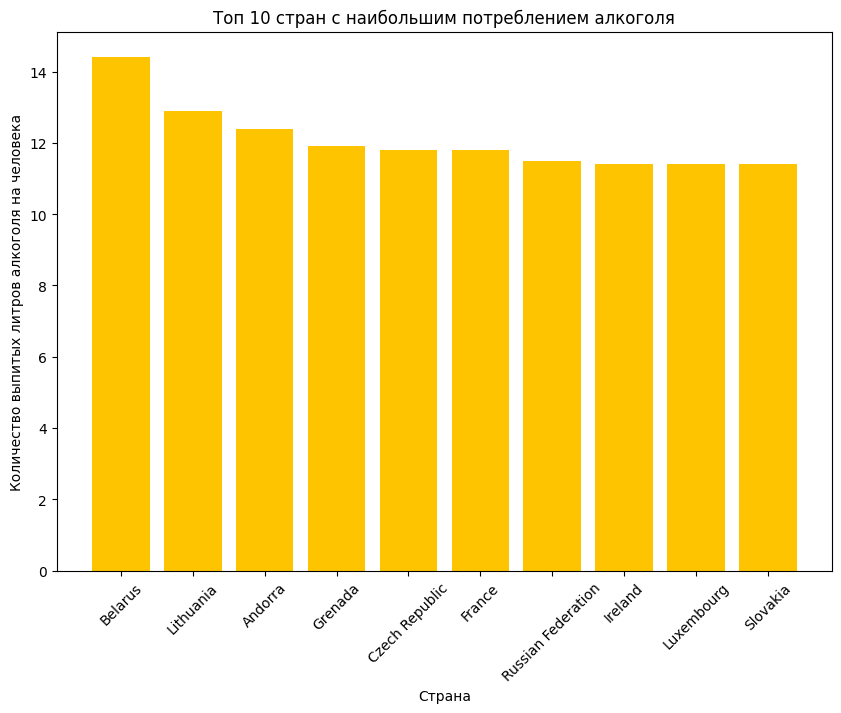

In [71]:
plt.figure(figsize=(10, 7))
plt.bar(df_litres['country'], df_litres['total_litres_of_pure_alcohol'], color='#FFC400')
plt.xlabel('Страна')
plt.ylabel('Количество выпитых литров алкоголя на человека')
plt.title('Топ 10 стран с наибольшим потреблением алкоголя')
plt.xticks(rotation=45)
plt.show()

Проанализируем полученные результаты:

* Намибия - лидер по выпитому количеству банок пива на душу населения (376). Неудивительно, что Германия (346) и Польша (343) тоже находятся в топе.

* Франция - лидер по выпитому количеству бокалов вину на душу населения (370) - неудивительно, также как и видеть Португалию (339) и Италию (237) в этом топе.

*  Гренада - лидер по выпитому количеству шотов крепких напитков  на душу населения (438). Беларусь (373) и Россия (326) конечно же недалеко от лидера. Интересно, что количество литров чистого алкоголя в Беларуси и России - 14.4 и 11.5 соответственно - немало, однако.

* Причем по общему потребления алкоголя Беларусь занимает 1-е место, а Россия - 7-е. Интересно, что в этом топе нет Намибии, в которой люди пьют больше всего пива.

# Задание 3

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам

* частоту употребления конкретных проклятий

* распределение времени между проклятиями

In [72]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/tarantino/tarantino.csv")
df.head(3)

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55


In [73]:
df.shape

(1894, 4)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [75]:
df.isnull().sum()

,0
movie,0
type,0
word,190
minutes_in,0


Есть пропуски в столбце `word`, что логично ведь в этих случаях не было проклинания, а было истечение кровью и столбец `type` есть `death`:

In [76]:
((df['type'] == 'death') & (df['word'].isnull())).sum() # Подтверждаем рассуждения

190

In [77]:
df.describe().map(lambda x: f"{x:.2f}")

,minutes_in
count,1894.00
mean,71.53
std,45.08
min,0.40
25%,29.66
50%,70.53
75%,112.84
max,160.45


In [78]:
df.describe(include=['object'])

,movie,type,word
count,1894,1894,1704
unique,7,2,60
top,Pulp Fiction,word,fucking
freq,476,1704,407


### Число проклятий, летальных исходов и их соотношение по фильмам

Число проклятий и летальных исходов:

In [79]:
df['type'].value_counts()

,count
type,
word,1704
death,190


Соотношение по фильмам (наведем немного красоту, чтобы первым стобцом были проклятия, ведь мы их хотим делить на летальные исходы):

In [80]:
curse_death_tab = pd.crosstab(df['movie'], df['type'])
curse_death_tab = curse_death_tab.reindex(columns=['word', 'death'])
curse_death_tab = curse_death_tab.rename(columns={'word':'Curses', 'death':'Deaths'})
curse_death_tab.loc['Total'] = curse_death_tab.sum()
curse_death_tab['Curse/death ratio'] = round(curse_death_tab['Curses'] / curse_death_tab['Deaths'], 1)
curse_death_tab

type,Curses,Deaths,Curse/death ratio
movie,,,
Django Unchained,262,47,5.6
Inglorious Basterds,58,48,1.2
Jackie Brown,368,4,92.0
Kill Bill: Vol. 1,57,63,0.9
Kill Bill: Vol. 2,69,11,6.3
Pulp Fiction,469,7,67.0
Reservoir Dogs,421,10,42.1
Total,1704,190,9.0


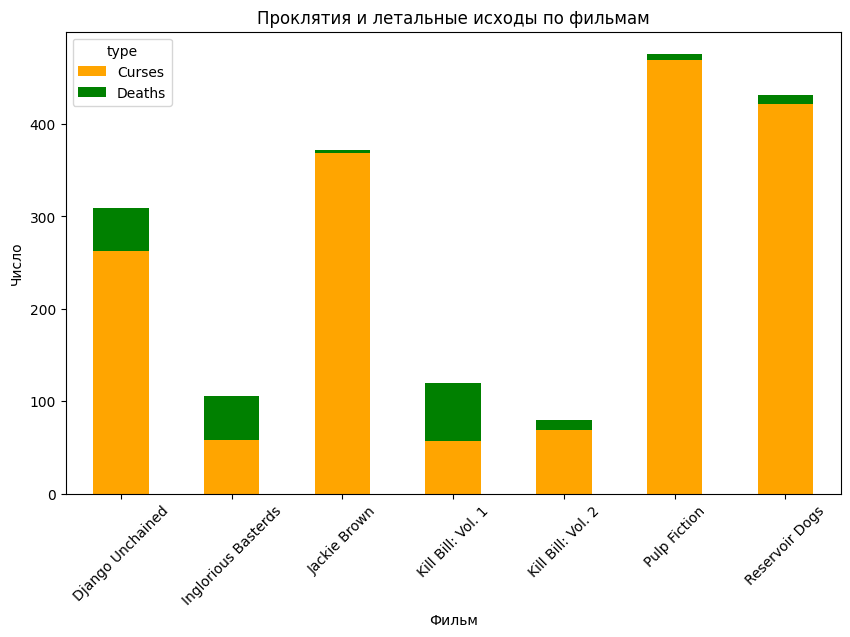

In [81]:
curse_death_tab.iloc[:-1, :-1].plot(kind='bar', figsize=(10, 6), stacked=True, color=['orange', 'green'])
plt.title('Проклятия и летальные исходы по фильмам')
plt.xlabel('Фильм')
plt.ylabel('Число')
plt.xticks(rotation=45)
plt.show()

### Частота употребления конкретных проклятий

Подчеркну, что под конкретным проклятием я понимаю любой уникальное проклятие в столбце `word`, ведь в условии никаких уточнений не дается.

In [82]:
word_count_tab = df[df['type'] == 'word']['word'].value_counts().to_frame()
word_count_tab['% of all curses'] = round(word_count_tab / word_count_tab.sum() * 100, 1)
word_count_tab

,count,% of all curses
word,,
fucking,407,23.9
shit,221,13.0
fuck,213,12.5
n-word,179,10.5
ass,140,8.2
goddamn,113,6.6
motherfucker,70,4.1
bitch,64,3.8
hell,45,2.6


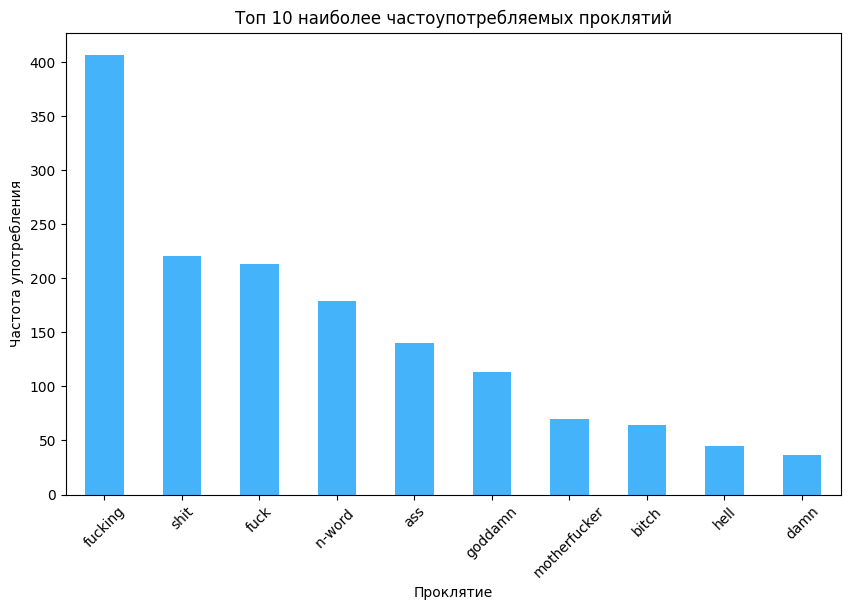

In [83]:
word_count_tab.iloc[:10, 0].plot(kind='bar', figsize=(10, 6), stacked=True, color='#45B3FA') # топ 10 по частоте посмотрим на графике
plt.title('Топ 10 наиболее частоупотребляемых проклятий')
plt.xlabel('Проклятие')
plt.ylabel('Частота употребления')
plt.xticks(rotation=45)
plt.show()

### Распределение времени между проклятиями

`minutes_in` - минута в фильме, на которой произошло событие.

Для определения распределения времени между проклятиями надо понять, какая разница между проклятиями во времени в каждом фильме (ведь у нас есть только время для конкретного фильма).

Для этого выполним сортировку по фильму и по минуте, а после будем вычислять разницы в каждой группе фильмов. Уберем NaN'ы (случаи, когда проклятие в 1 раз упоминается в фильме и нету предшествующего значения, чтобы сделать вычитание) и посмотрим на результат:

In [84]:
df_course = df[df['type'] == 'word'].sort_values(by=['movie', 'minutes_in'])
df_time_diff = df_course.groupby('movie')['minutes_in'].diff().dropna()
df_time_diff.head()

,minutes_in
1215,1.14
1216,0.01
1217,0.27
1218,0.22
1219,0.01


Посмотрим характеристики данных:

In [85]:
df_time_diff.describe()

,minutes_in
count,1697.000000
mean,0.513913
std,1.374654
min,0.000000
25%,0.040000
50%,0.100000
75%,0.380000
max,16.720000


Теперь, имея выборку, посмотрим, что за распределение получилось. Для этого построим гистограмму. Укажем в `histplot` аргумент `kde`, чтобы увидеть оценку плотности вероятности.

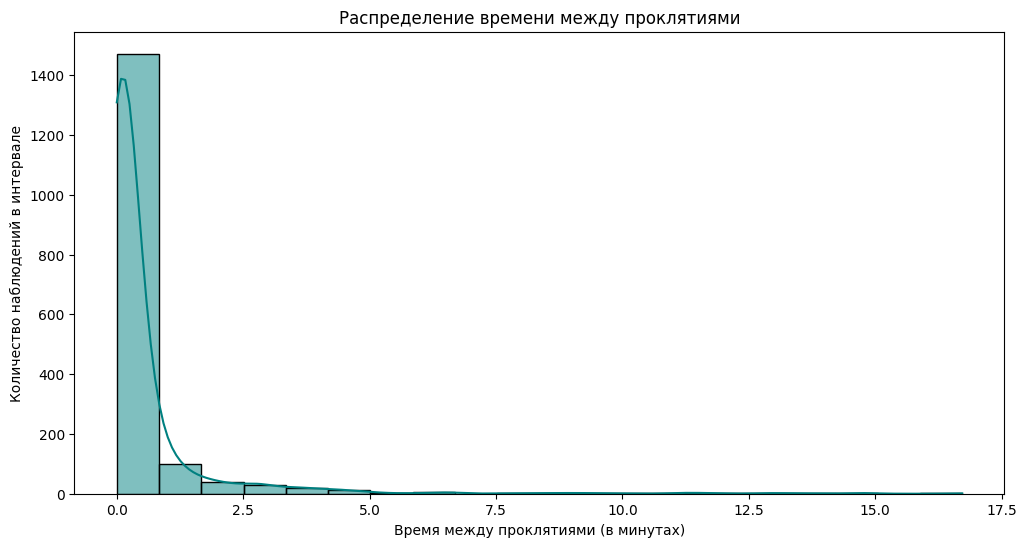

In [86]:
plt.figure(figsize=(12, 6))
sns.histplot(df_time_diff, bins=20, kde=True, color='teal')
plt.title('Распределение времени между проклятиями')
plt.xlabel('Время между проклятиями (в минутах)')
plt.ylabel('Количество наблюдений в интервале')
plt.show()

Тут можно начать накидывать распределения (типо логнормальное или какое-нибудь экспоненциальное), но в условии не было указано определить вид распределения, к тому же проверка гипотез - это уже следующее домашнее задание, где мы сполна хлебнем всех нюансов и деталей.